In [2]:
#importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

C:\ProgramData\Anaconda\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
# opening multiple netcdf files at once 
ds_Turkey=xr.open_mfdataset('C:\\Users\\UPGRAY\\New folder (2)\\*.nc')
ds_Turkey=ds_Turkey.where(ds_Turkey !=-99)
ds_Turkey

<xarray.Dataset>
Dimensions:   (datetime: 3958, lat: 27, lon: 79)
Coordinates:
  * lon       (lon) float32 25.5 25.75 26.0 26.25 26.5 ... 44.25 44.5 44.75 45.0
  * lat       (lat) float32 42.5 42.25 42.0 41.75 41.5 ... 36.75 36.5 36.25 36.0
  * datetime  (datetime) datetime64[ns] 2000-03-01 2000-03-02 ... 2010-12-31
Data variables:
    crs       (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(306, 27, 79), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
#checking datasets properties 
type(ds_Turkey)

# checking the coordinates and dimensions 
ds_Turkey.coords

#checking the attributes
ds_Turkey.attrs

{'Conventions': 'CF-1.6'}

In [5]:
# checking variables available
ds_Turkey.data_vars

Data variables:
    crs      (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip   (datetime, lat, lon) float32 dask.array<chunksize=(306, 27, 79), meta=np.ndarray>

In [6]:
# assigning data's to variable precip
da_Turkey = ds_Turkey.precip

# removing all missing values
da_Turkey = da_Turkey.where(da_Turkey !=-99)

In [7]:
# checking data type
type(da_Turkey)

xarray.core.dataarray.DataArray

In [8]:
coords_Turkey=da_Turkey.sel(lon=35, lat=39, datetime=slice('2001','2010'))
coords_Turkey

<xarray.DataArray 'precip' (datetime: 3652)>
dask.array<getitem, shape=(3652,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 35.0
    lat       float32 39.0
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  crs

In [9]:
# MONTHLY RAINFALL TOTALS
Monthly_RR = coords_Turkey.groupby('datetime.month').sum('datetime')
Monthly_RR.to_series().reset_index()

,month,precip
0,1,294.809998
1,2,335.530029
2,3,242.839996
3,4,336.749969
4,5,240.470001
5,6,98.190002
6,7,43.490002
7,8,15.200000
8,9,81.059998
9,10,132.779999


In [10]:
#  LONG TERM CLIMATOLOGIES 
Longterm_Climatology_RR= coords_Turkey.groupby('datetime.month').mean('datetime')
Longterm_Climatology_RR.to_series().reset_index()

,month,precip
0,1,0.951000
1,2,1.189823
2,3,0.785890
3,4,1.122500
4,5,0.775710
5,6,0.327300
6,7,0.140290
7,8,0.049032
8,9,0.270200
9,10,0.428323


Text(0.5, 1.0, 'monthly_Rainfall')

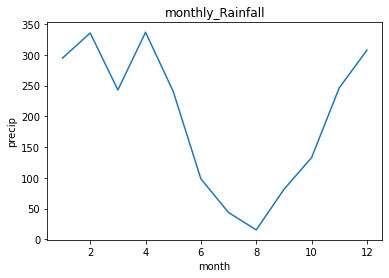

In [11]:
Monthly_RR.plot()
plt.title('monthly_Rainfall')

Text(0.5, 1.0, 'monthly_climatology')

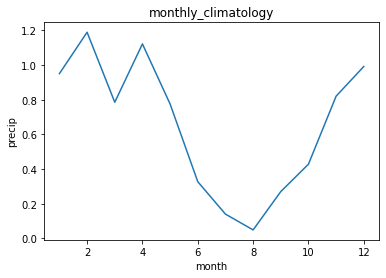

In [12]:
Longterm_Climatology_RR.plot()
plt.title('monthly_climatology')

In [13]:
# computing Annual Totals
Annual_Totals_RR = coords_Turkey.resample(datetime='1Y').sum('datetime')
Annual_Totals_RR.to_series().reset_index()

,datetime,precip
0,2001-12-31,262.029999
1,2002-12-31,206.119995
2,2003-12-31,168.399994
3,2004-12-31,291.279999
4,2005-12-31,208.240021
5,2006-12-31,217.139984
6,2007-12-31,408.700012
7,2008-12-31,148.830002
8,2009-12-31,223.170013
9,2010-12-31,241.040009


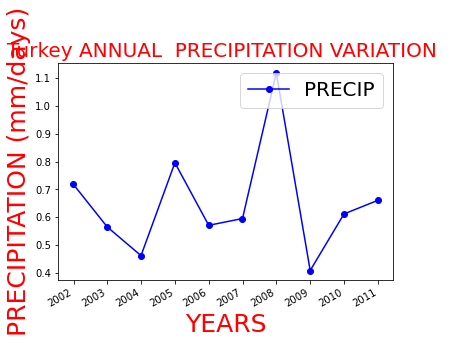

In [14]:
# Annual Average
Annual_Totals_RR= coords_Turkey.resample(datetime='1Y').mean('datetime')
Annual_Totals_RR.plot(color = 'b',marker='o', label='PRECIP')

barwidth = 0.3
plt.rcParams['figure.figsize']=[13,8]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=25, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')

plt.title('Turkey ANNUAL  PRECIPITATION VARIATION ', fontsize=20, color='r')
    
plt.show()

In [15]:
Annual_Average_RR= coords_Turkey.groupby('datetime.year').sum('datetime')
Annual_Average_RR.to_series().reset_index()

,year,precip
0,2001,262.029999
1,2002,206.119995
2,2003,168.399994
3,2004,291.279999
4,2005,208.240021
5,2006,217.139984
6,2007,408.700012
7,2008,148.830002
8,2009,223.170013
9,2010,241.040009


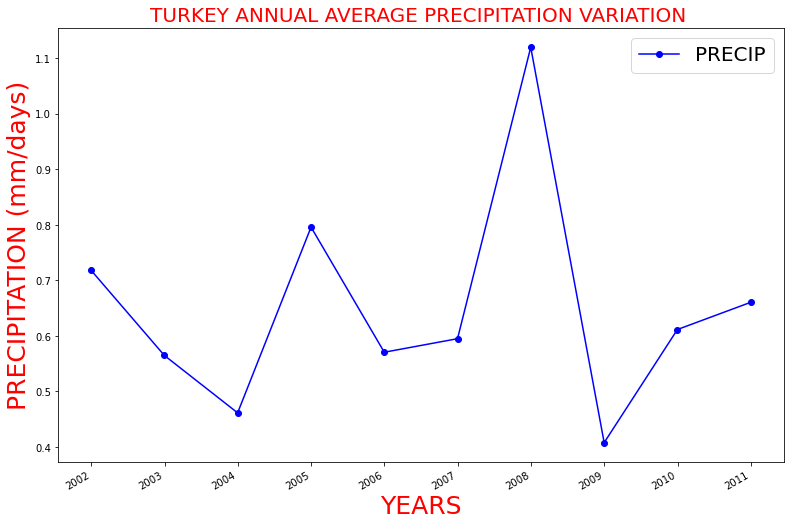

In [16]:
# Annual Average
Annual_Average_RR= coords_Turkey.resample(datetime='1Y').mean('datetime')
Annual_Average_RR.plot(color = 'b',marker='o', label='PRECIP')

barwidth = 0.3
plt.rcParams['figure.figsize']=[10,8]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=25, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')

plt.title('TURKEY ANNUAL AVERAGE PRECIPITATION VARIATION ', fontsize=20, color='r')
    
#plt.savefig('Annual_average_timeseries.png')
plt.show()

In [17]:
Monthly_RR2 = coords_Turkey.groupby('datetime.month').sum()
Monthly_RR2

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 35.0
    lat      float32 39.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [18]:
#computing the number of dry PER MONTH
#selecting precipitation <1mm
dry_CRR= da_Turkey.where(da_Turkey <1).sel(lon=35, lat=39, datetime=slice('2001','2010'))
dry_CRR=dry_CRR.where(dry_CRR !=-99)

dry_cmon=dry_CRR.groupby('datetime.month').mean('datetime')
dry_cmon.to_series().reset_index()

,month,precip
0,1,0.145880
1,2,0.111515
2,3,0.079960
3,4,0.096368
4,5,0.070859
5,6,0.037022
6,7,0.015132
7,8,0.004248
8,9,0.016413
9,10,0.045986


In [19]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------MONTHLY--------
#computing the number of dry PER MONTH
#selecting precipitation <1mm
dry_RR= da_Turkey.where(da_Turkey <1)
dry_RR=dry_RR.where(dry_RR !=-99)

dry_mon=dry_RR.groupby('datetime.month').mean('datetime')
dry_mon.to_series().reset_index()

# cartopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cf

In [20]:
# COMPUTING THE NUMBER FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Turkey.where(da_Turkey >=1).sel(lon=35, lat=39, datetime=slice('2001','2010'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').mean('datetime')
wet_cmon.to_series().reset_index()

,month,precip
0,1,4.305666
1,2,6.073921
2,3,3.777118
3,4,4.760606
4,5,4.117222
5,6,3.147143
6,7,4.865000
7,8,3.475000
8,9,3.188750
9,10,3.869355


In [21]:
# selecting coordintes
coordinates_Turkey=ds_Turkey.sel(lon=35, lat=39, datetime=slice('2001','2010'))

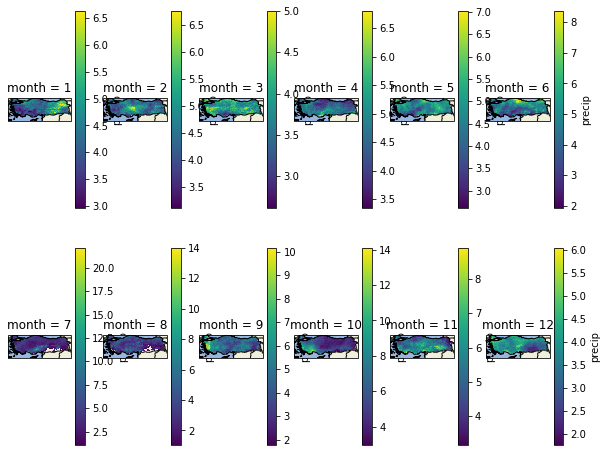

In [22]:
# SPATIAL PLOTS FOR THE NUMBER OF WET (RR>=1mm)----------------MONTHLY--------

#selecting precipitation >1mm
wet_RR= da_Turkey.where(da_Turkey >=1)
wet_RR=wet_RR.where(wet_RR !=-99)
wet_RR
wet_mon=wet_RR.groupby('datetime.month').mean('datetime')
wet_mon.to_series().reset_index()
fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#wet_mon.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Months in wet_mon.month:
    count+=1
    ax=fig.add_subplot(2,6,count,projection=ccrs.PlateCarree())
    wet_mon[wet_mon.month==Months].plot()
    
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([25, 45, 35, 42])

In [23]:
#-----------COMPUTING THE NUMBER OF DRY (RR<1mm) PER ANNUAL-------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= da_Turkey.where(da_Turkey <1).sel(lon=35, lat=39, datetime=slice('2001','2010'))
Annual_dry_RR
Annual_cdry=Annual_dry_RR.groupby('datetime.year').mean('datetime')
Annual_cdry.to_series().reset_index()

,year,precip
0,2001,0.049845
1,2002,0.072890
2,2003,0.083938
3,2004,0.058805
4,2005,0.050400
5,2006,0.074630
6,2007,0.068803
7,2008,0.057804
8,2009,0.055106
9,2010,0.051346


In [32]:
#selecting precipitation >1mm
Annual_wet_RR= da_Turkey.where(da_Turkey >=1).sel(lon=35, lat=39, datetime=slice('2000','2009'))
Annual_wet_RR
# GROUPING data in years
Annual_cwet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_cwet.to_series().reset_index()

,year,precip
0,2000,5.420000
1,2001,5.720465
2,2002,3.222281
3,2003,3.145333
4,2004,5.678751
5,2005,4.796500
6,2006,3.591296
7,2007,4.804444
8,2008,4.619643
9,2009,5.695555


In [25]:
#selecting precipitation >1mm
Annual_wet_RR= da_Turkey.where(da_Turkey >=1).sel(lon=35, lat=39, datetime=slice('2001','2010'))
Annual_wet_RR
# GROUPING data in years
Annual_cwet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_cwet.to_series().reset_index()
    
   

,year,precip
0,2001,5.720465
1,2002,3.222281
2,2003,3.145333
3,2004,5.678751
4,2005,4.796500
5,2006,3.591296
6,2007,4.804444
7,2008,4.619643
8,2009,5.695555
9,2010,4.245660


ValueError: num must be 1 <= num <= 10, not 11

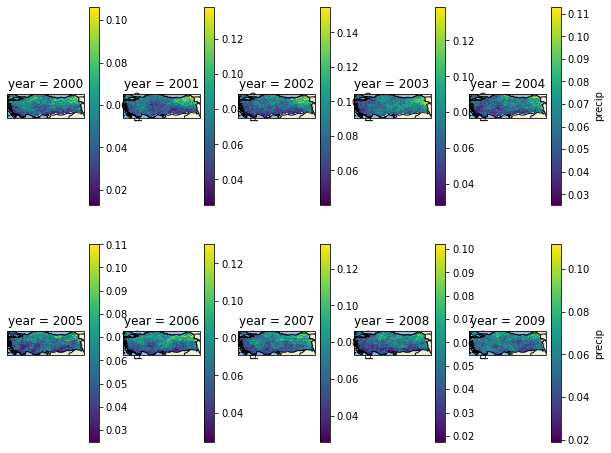

In [26]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= da_Turkey.where(da_Turkey <1)
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').mean('datetime')
Annual_dry



fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
count=0
for Years in Annual_dry.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_dry[Annual_dry.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([26,45,42,36])

plt.show()

In [ ]:
Annual_wet_RR= da_Turkey.where(da_Turkey >=1)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_wet

fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

count=0
for Years in Annual_wet.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_wet[Annual_wet.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([26,45,42,36])

plt.show()

In [ ]:
# selecting coordintes
coordinates_Turkey=ds_Turkey.sel(lon=35, lat=39, datetime=slice('2001','2010'))

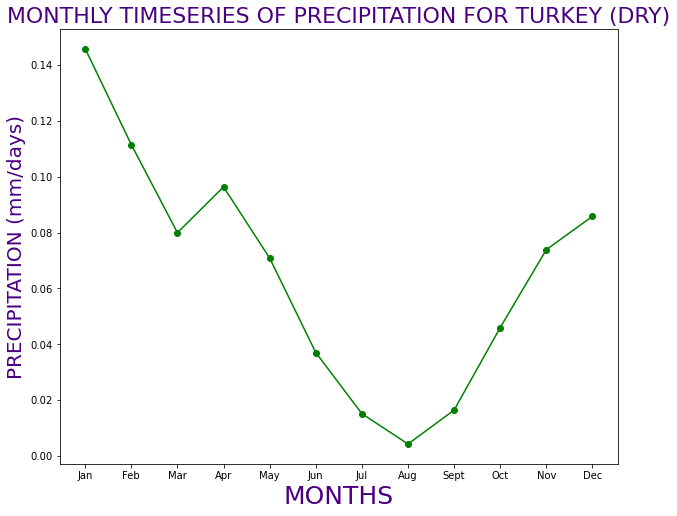

In [27]:
#computing the number of dry PER MONTH TIMESERIES
#selecting precipitation <1mm
dry_RR= dry_cmon.where(dry_cmon <1)
dry_RR=dry_RR.where(dry_RR !=-99)
Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

plt.plot(Months,dry_RR,color = 'g',marker='o', label='PRECIP')
plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR TURKEY (DRY)', fontsize='22', color='indigo')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='indigo')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='indigo')
plt.savefig('MONTHLY (TIMESERIES(DRY MONTH).png')
plt.show()

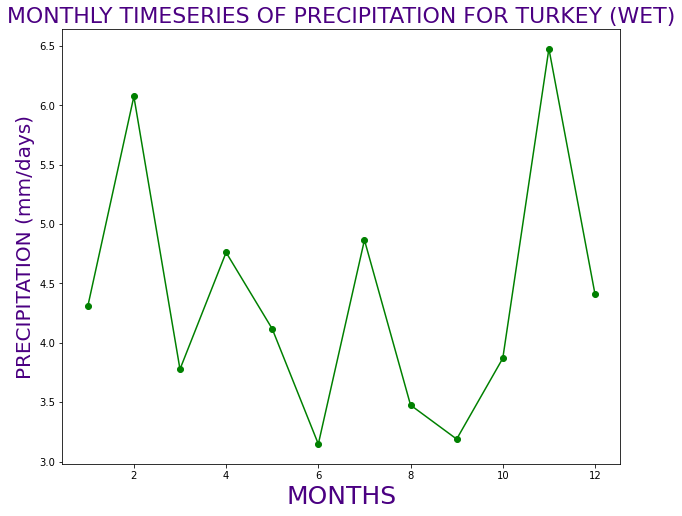

In [28]:
# TIMESERIES PLOT FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Turkey.where(da_Turkey >=1).sel(lon=35, lat=39, datetime=slice('2001','2010'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').mean('datetime')
wet_cmon.plot(color = 'g',marker='o', label='PRECIP')

plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR TURKEY (WET)', fontsize='22', color='indigo')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='indigo')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='indigo')

plt.show()

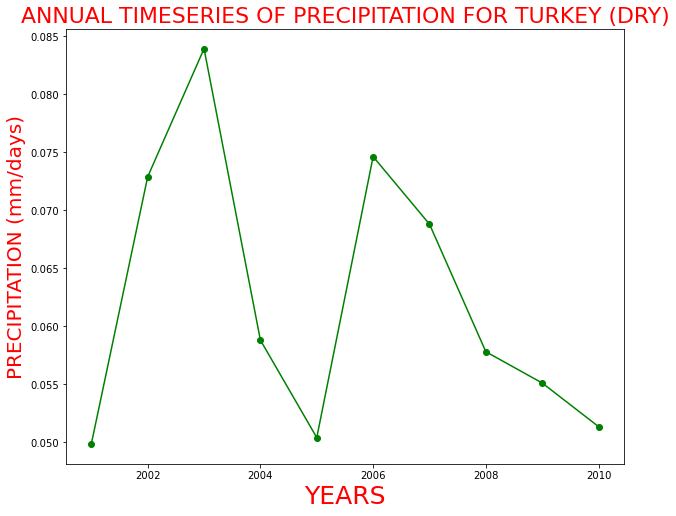

In [29]:
# COMPUTING THE NUMBER OF DRY (RR<1mm)-----MONTHLY TIMESERIES----
#selecting precipitation <1mm
Annual_cdry.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL TIMESERIES OF PRECIPITATION FOR TURKEY (DRY)', fontsize='22', color='r')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

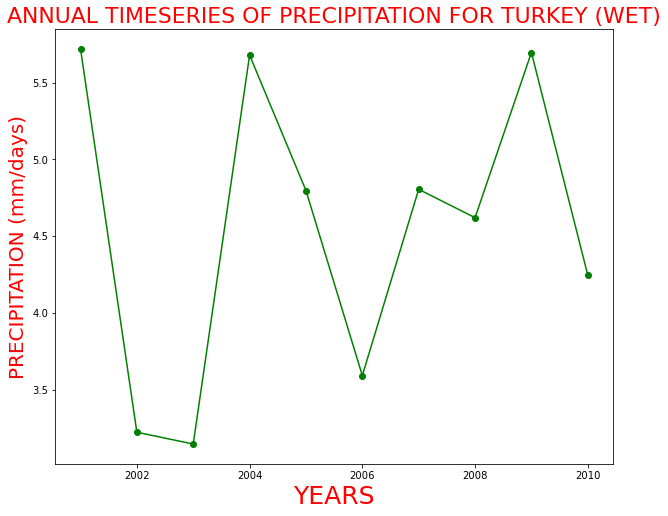

In [30]:
# COMPUTING THE NUMBER OF DRY (RR>=1mm) MONTHLY
#selecting precipitation >1mm

Annual_cwet.plot(color = 'g',marker='o', label='PRECIP')
plt.title('ANNUAL TIMESERIES OF PRECIPITATION FOR TURKEY (WET)', fontsize='22', color='r')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

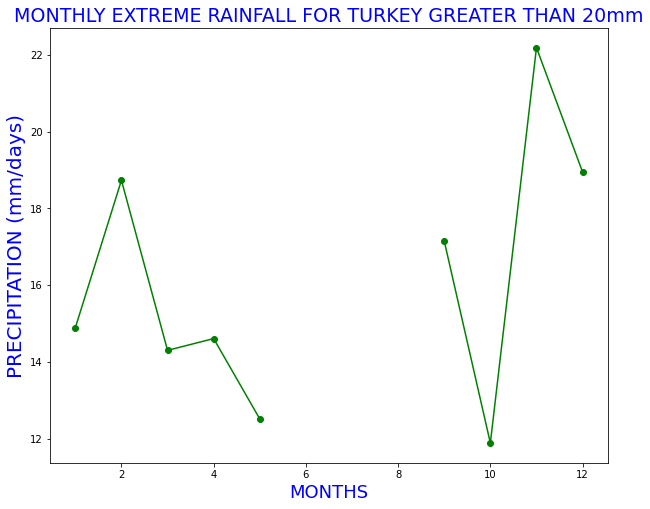

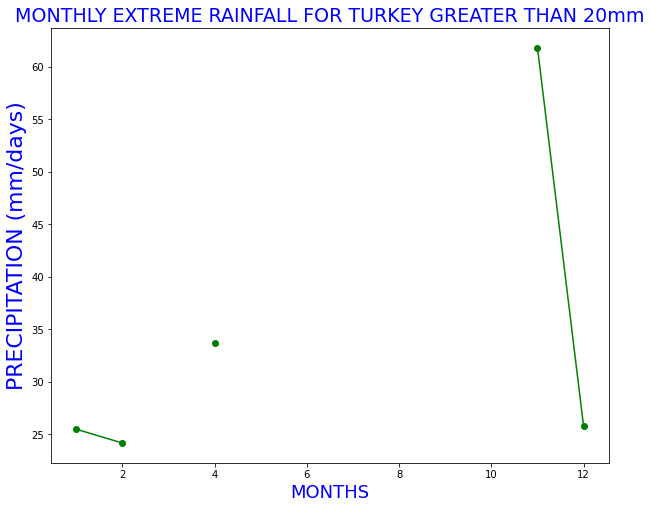

In [31]:
# COMPUTING THE NUMBER OF DRY (RR>10mm)-----MONTHLY TIMESERIES----
#selecting precipitation >10mm
dry_RR= coordinates_Turkey.where(coordinates_Turkey['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.month').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
dry1
plt.title('MONTHLY EXTREME RAINFALL FOR TURKEY GREATER THAN 20mm', fontsize='19', color='b')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='b')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='b')

plt.show()

#selecting precipitation >20mm
dry_RR= coordinates_Turkey.where(coordinates_Turkey['precip'] >20).precip
dry_RR
dry_RR.sel()
dry2=dry_RR.groupby('datetime.month').mean('datetime')
dry2
dry2.plot(color = 'g',marker='o', label='PRECIP');
plt.title('MONTHLY EXTREME RAINFALL FOR TURKEY GREATER THAN 20mm', fontsize='19', color='b')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=22, color='b')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='b')
plt.savefig('MONTHLY EXTREME RR(20).png')
plt.show()

In [ ]:
# COMPUTING THE NUMBER OF DRY (RR>10mm)-----ANNUAL TIMESERIES----
#selecting precipitation >10mm
dry_RR= coordinates_Turkey.where(coordinates_Turkey['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.year').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR TURKEY GREATER THAN 10mm', fontsize='18', color='g')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='g')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='g')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

#selecting precipitation >20mm
dry_RR= coordinates_Turkey.where(coordinates_Turkey['precip'] >20).precip
dry_RR
dry1=dry_RR.groupby('datetime.year').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR TURKEY GREATER THAN 20mm', fontsize='22', color='g')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='g')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='g')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

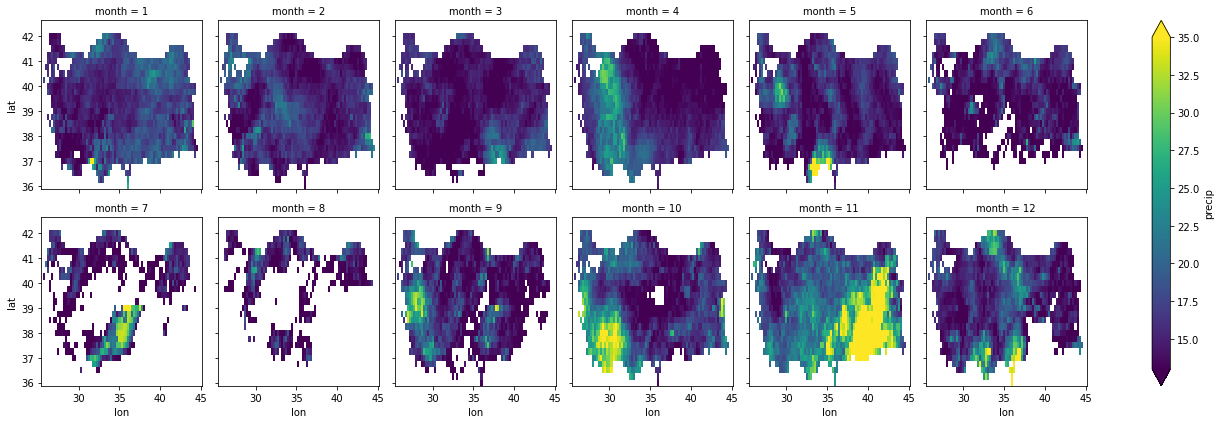

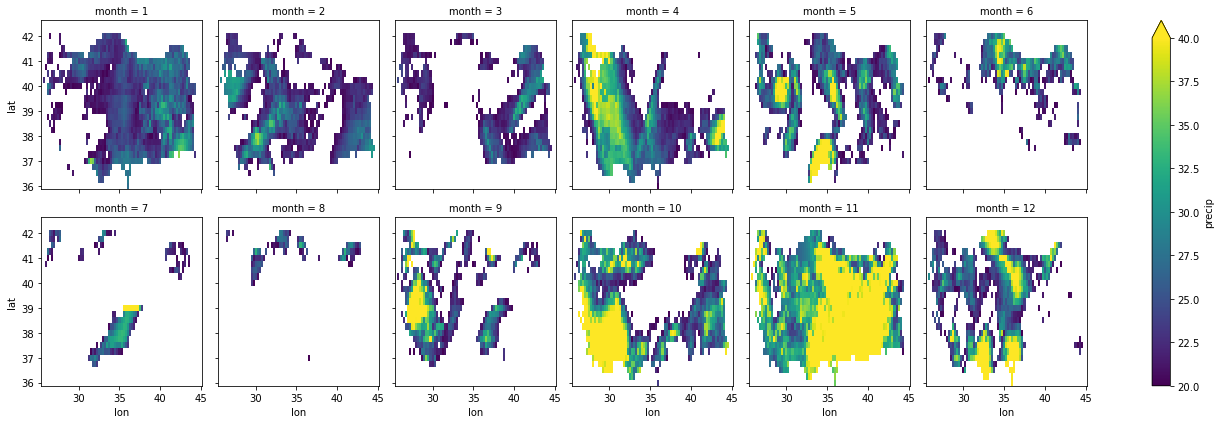

In [191]:
#selecting precipitation >10mm
dry_RR= ds_Turkey.where(ds_Turkey['precip'] >10).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=35, vmin=13, col_wrap=6, col='month');

plt.show()

#selecting precipitation >20mm
dry_RR= ds_Turkey.where(ds_Turkey['precip'] >20).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=40, vmin=20, col_wrap=6, col='month');

plt.show()

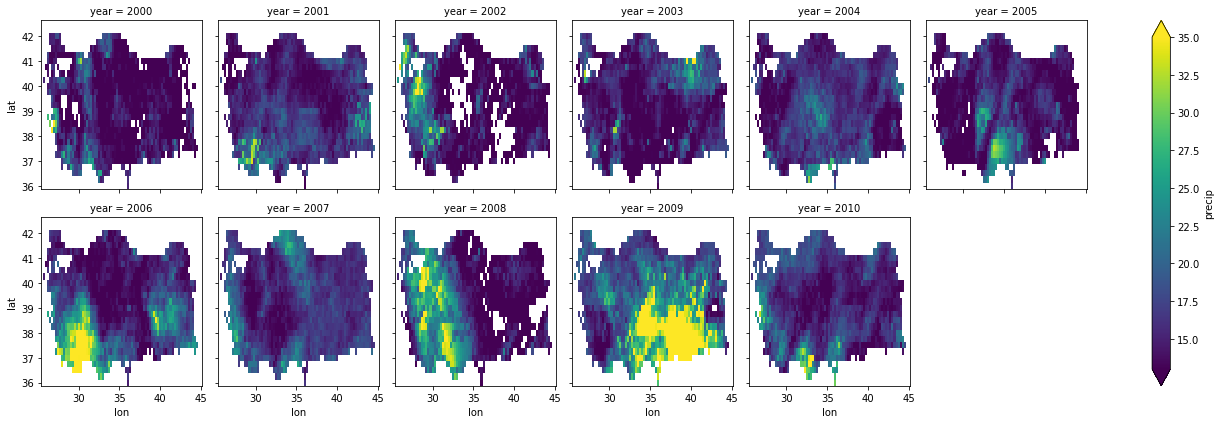

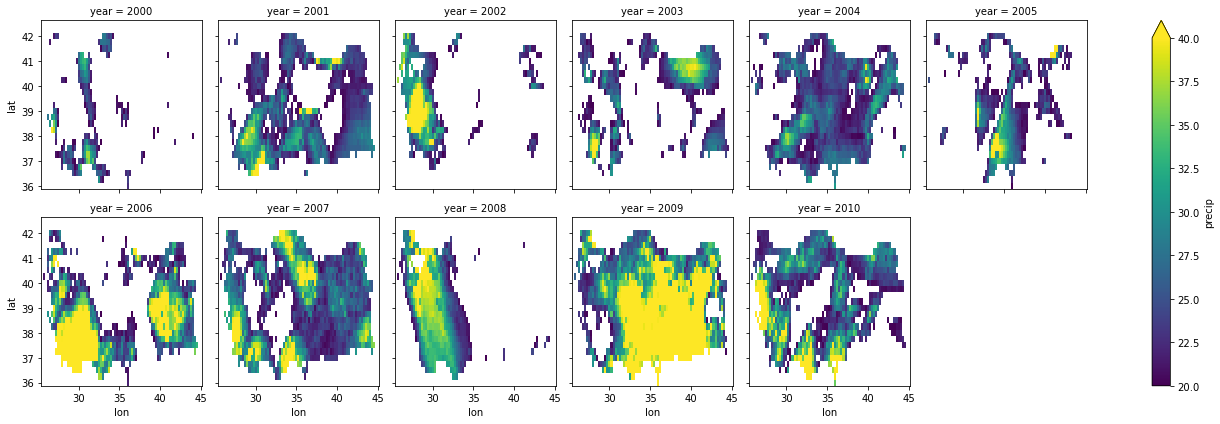

In [193]:
#selecting precipitation >10mm
dry_RR= ds_Turkey.where(ds_Turkey['precip'] >10).precip
dry_RR

dry1=dry_RR.groupby('datetime.year').mean('datetime')[:,:,:]
dry1.plot(vmax=35, vmin=13, col_wrap=6, col='year');

plt.show()

#selecting precipitation >20mm
dry_RR= ds_Turkey.where(ds_Turkey['precip'] >20).precip
dry_RR

dry1=dry_RR.groupby('datetime.year').mean('datetime')[:,:,:]
dry1.plot(vmax=40, vmin=20, col_wrap=6, col='year');

plt.show()